In [4]:
from sklearn.datasets  import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt

In [5]:
X, y = mglearn.datasets.load_extended_boston()


/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [6]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state= 0) 

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 104)
(379,)
(127, 104)
(127,)


 - Make the model
 - fit the model 
 - test predictions
 - get the score 

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

- Score : Return the coefficient of determination of the prediction.
- Predict : Predict using the linear model.

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.

 # Ridge regression
 - same as the linear model regression (OLS), but the only caviet is that Ridge regression W coefficient should be close to 0 
 -  Used with Multicollinearity the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.
 

In [10]:
from sklearn.linear_model import Ridge

In [11]:
ridge = Ridge().fit(X_train, y_train)

In [12]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


 - As you can see, the training set score of Ridge is lower  while the test set score is higher. 
 - W Coefficients should be as close to 0 as possible. 
 - Ridge is a more restricted model, so we are less likely to overfit. 
 - As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.
 - Mathematically, Ridge penalizes the L2 norm of the coefficients, or the Euclidean length of w.
 - Regularization means explicitly restricting a model to avoid overfitting.
 - Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.
 - increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization

In [13]:
ridge10 = Ridge(alpha = 1).fit(X_train, y_train)

# Alpha 
- higher aplha more restrictive model better on training cases

In [21]:
print(" Train Test Score 10:  {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge10.coef_ != 0)))

 Train Test Score 10:  0.89
Test set score: 0.75
Number of features used: 104


In [22]:
ridge01 = Ridge(alpha=0.001).fit(X_train, y_train)

In [23]:
print("Train Score : {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test Score : {:.2f}".format(ridge01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge01.coef_ != 0)))

Train Score : 0.95
Test Score : 0.63
Number of features used: 104


- alpha=0.1 seems to be working well. We could try decreasing alpha even more to improve generalization

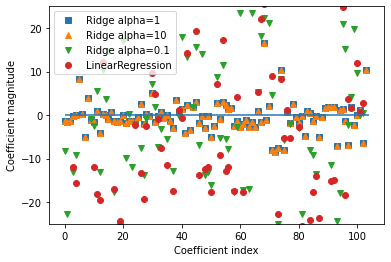

In [25]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

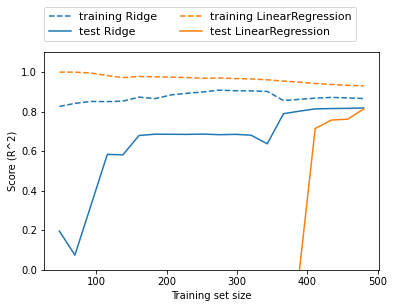

In [26]:
mglearn.plots.plot_ridge_n_samples()

# Lasso
- The lasso penalizes the L1 norm of the coefficient vector—or in other words, the sum of the absolute values of the coefficients.
- A lower alpha allowed us to fit a more complex model
- alpha=0.00001 model is unregularized 

In [27]:
from sklearn.linear_model import Lasso

In [30]:
lasso = Lasso().fit(X_train, y_train)
print(" Train Score: {:.3f}".format(lasso.score(X_train, y_train)))
print(" Train Score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


 Train Score: 0.293
 Train Score: 0.21
Number of features used: 4


In [32]:
lasso1 = Lasso(alpha = .01,  max_iter = 100000).fit(X_train, y_train)
lasso001 = Lasso(alpha =.001,  max_iter = 100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha =.000001,  max_iter = 100000).fit(X_train, y_train)


/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [31]:
print("Training Set : {:.2f}".format(lasso1.score(X_train, y_train)))
print("Testing Set : {:.2f}".format(lasso1.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1.coef_ != 0)))


Training Set : 0.90
Testing Set : 0.77
Number of features used: 33


In [33]:
print("Training Set : {:.2f}".format(lasso001.score(X_train, y_train)))
print("Testing Set : {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1.coef_ != 0)))

Training Set : 0.94
Testing Set : 0.74
Number of features used: 33


In [34]:
print("Training Set : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Testing Set : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1.coef_ != 0)))

Training Set : 0.95
Testing Set : 0.61
Number of features used: 33


Text(0, 0.5, 'Coefficient magnitude')

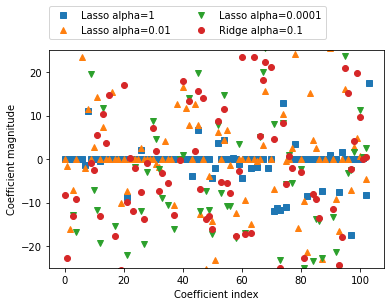

In [35]:
plt.plot(lasso1.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")